In [ ]:
!pip install shap

In [ ]:
import shap
import joblib
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


SHAP Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load model
try:
    model = joblib.load("/content/drive/My Drive/models/xgboost_model.pkl")
    print("Modèle chargé avec succès depuis Google Drive.")
except FileNotFoundError:
    print("Erreur : Le fichier 'xgboost_model.pkl' n'a pas été trouvé dans le chemin spécifié de votre Google Drive.")
    print("Veuillez vérifier que le fichier existe à l'adresse '/content/drive/My Drive/models/xgboost_model.pkl'")
# Load and preprocess the dataset (same as in training!)

# Download dataset from Kaggle
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
# Load the dataset using the full path
df = pd.read_csv(f"{path}/creditcard.csv")


X = df.drop("Class", axis=1)
y = df["Class"]

# Feature scaling for Time and Amount (as done before)
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Train-test split (same seed as training)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Modèle chargé avec succès depuis Google Drive.



### 1. SHAP Analysis for XGBoost




In [ ]:
# Create SHAP explainer for tree-based model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


SHAP Summary Plot

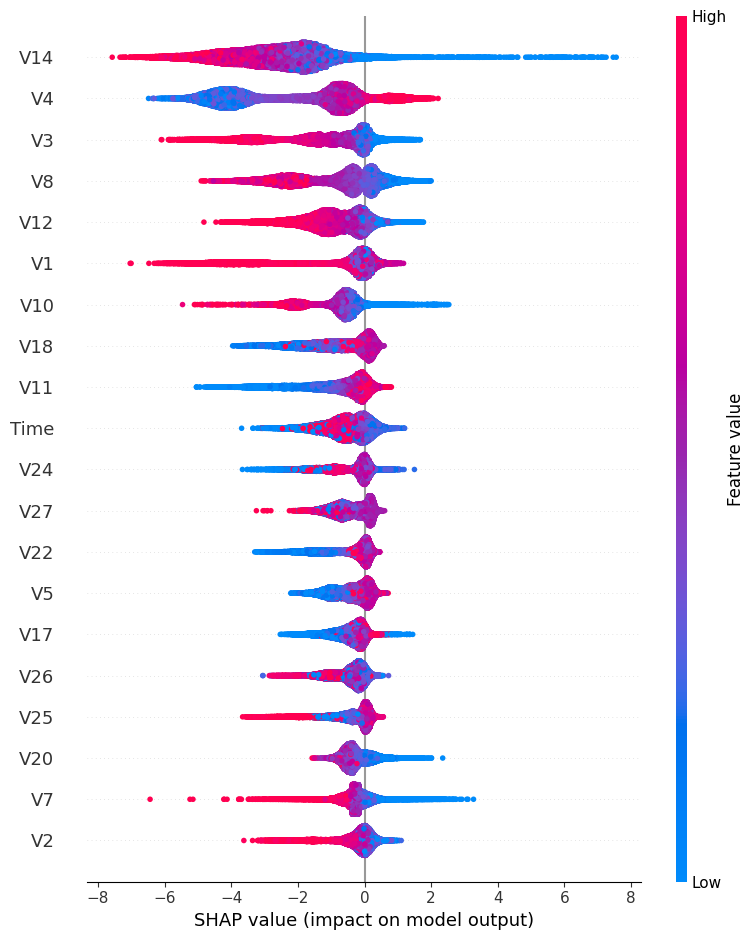

In [ ]:
shap.summary_plot(shap_values, X_test)


SHAP Force Plot

In [ ]:
# Force plot for first prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


In [ ]:
import numpy as np
import os

# Create the directory if it doesn't exist
if not os.path.exists("results"):
    os.makedirs("results")
np.save("results/shap_values.npy", shap_values)
X_test.to_csv("results/x_test_for_shap.csv", index=False)

## 2. SHAP Analysis for Logistic Regression

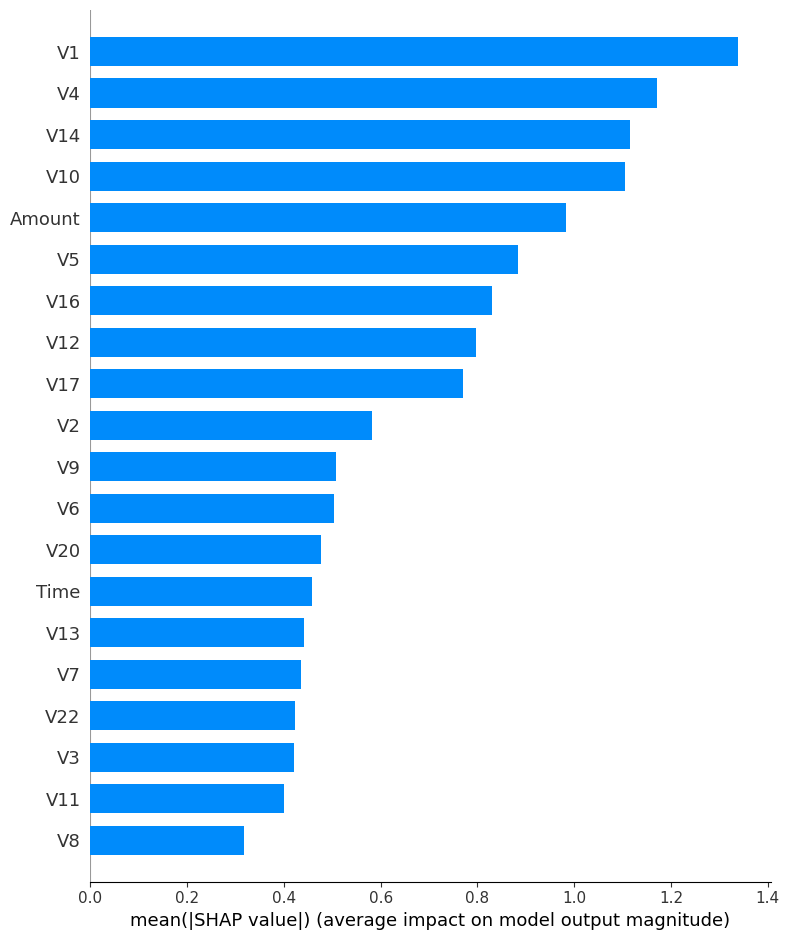

In [ ]:
from sklearn.linear_model import LogisticRegression

# Load model from Drive (adjust if saved elsewhere)
logreg_model = joblib.load("/content/drive/My Drive/models/logistic_model.pkl")

# Use same X_test (already preprocessed and scaled earlier)
# Use LinearExplainer for linear models
log_explainer = shap.LinearExplainer(logreg_model, X_test, feature_perturbation="interventional")
log_shap_values = log_explainer.shap_values(X_test)

# SHAP Summary Plot for Logistic Regression
shap.summary_plot(log_shap_values, X_test, plot_type="bar")

III/ SHAP Bar Plots Side by Side

In [ ]:
import shap

# Use TreeExplainer for XGBoost
best_xgb = joblib.load("/content/drive/My Drive/models/xgboost_model.pkl")
#Computing XGBoost via TreeExplorer
xgb_explainer = shap.TreeExplainer(best_xgb)
xgb_shap_values = xgb_explainer.shap_values(X_test)


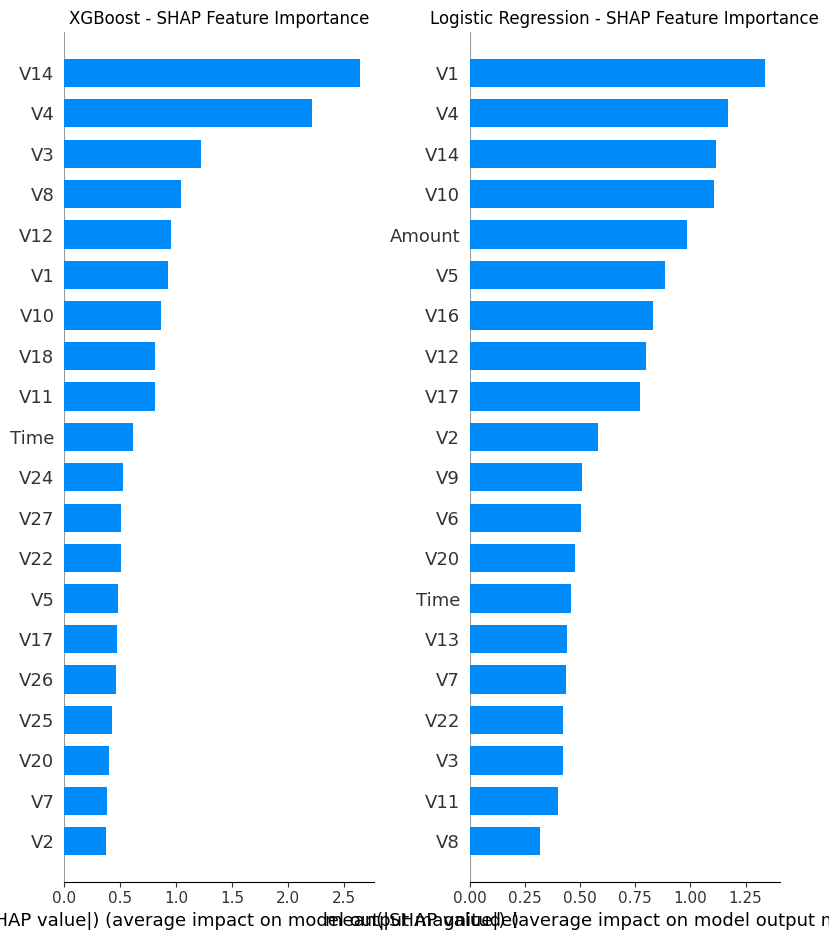

In [ ]:
import matplotlib.pyplot as plt

# Create side-by-side SHAP bar plots
plt.figure(figsize=(14, 5))

# XGBoost Plot
plt.subplot(1, 2, 1)
shap.summary_plot(xgb_shap_values, X_test, plot_type="bar", show=False)
plt.title("XGBoost - SHAP Feature Importance")

# Logistic Regression Plot
plt.subplot(1, 2, 2)
shap.summary_plot(log_shap_values, X_test, plot_type="bar", show=False)
plt.title("Logistic Regression - SHAP Feature Importance")

plt.tight_layout()
plt.show()
